# Chargement des librairies

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import gc
import os
import pickle
from tqdm.notebook import tqdm

%matplotlib inline
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Visualisation des données

In [4]:
train = pd.read_json("train.json",lines=True)
test  = pd.read_json("test.json",lines=True)
sub = pd.read_csv("sample_submission.csv")

In [5]:
train.head()

,index,id,sequence,structure,predicted_loop_type,signal_to_noise,SN_filter,seq_length,seq_scored,reactivity_error,deg_error_Mg_pH10,deg_error_pH10,deg_error_Mg_50C,deg_error_50C,reactivity,deg_Mg_pH10,deg_pH10,deg_Mg_50C,deg_50C
0,0,id_001f94081,GGAAAAGCUCUAAUAACAGGAGACUAGGACUACGUAUUUCUAGGUA...,.....((((((.......)))).)).((.....((..((((((......,EEEEESSSSSSHHHHHHHSSSSBSSXSSIIIIISSIISSSSSSHHH...,6.894,1,107,68,"[0.1359, 0.20700000000000002, 0.1633, 0.1452, ...","[0.26130000000000003, 0.38420000000000004, 0.1...","[0.2631, 0.28600000000000003, 0.0964, 0.1574, ...","[0.1501, 0.275, 0.0947, 0.18660000000000002, 0...","[0.2167, 0.34750000000000003, 0.188, 0.2124, 0...","[0.3297, 1.5693000000000001, 1.1227, 0.8686, 0...","[0.7556, 2.983, 0.2526, 1.3789, 0.637600000000...","[2.3375, 3.5060000000000002, 0.3008, 1.0108, 0...","[0.35810000000000003, 2.9683, 0.2589, 1.4552, ...","[0.6382, 3.4773, 0.9988, 1.3228, 0.78770000000..."
1,1,id_0049f53ba,GGAAAAAGCGCGCGCGGUUAGCGCGCGCUUUUGCGCGCGCUGUACC...,.....(((((((((((((((((((((((....)))))))))).)))...,EEEEESSSSSSSSSSSSSSSSSSSSSSSHHHHSSSSSSSSSSBSSS...,0.193,0,107,68,"[2.8272, 2.8272, 2.8272, 4.7343, 2.5676, 2.567...","[73705.3985, 73705.3985, 73705.3985, 73705.398...","[10.1986, 9.2418, 5.0933, 5.0933, 5.0933, 5.09...","[16.6174, 13.868, 8.1968, 8.1968, 8.1968, 8.19...","[15.4857, 7.9596, 13.3957, 5.8777, 5.8777, 5.8...","[0.0, 0.0, 0.0, 2.2965, 0.0, 0.0, 0.0, 0.0, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[4.947, 4.4523, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[4.8511, 4.0426, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[7.6692, 0.0, 10.9561, 0.0, 0.0, 0.0, 0.0, 0.0..."
2,2,id_006f36f57,GGAAAGUGCUCAGAUAAGCUAAGCUCGAAUAGCAAUCGAAUAGAAU...,.....((((.((.....((((.(((.....)))..((((......)...,EEEEESSSSISSIIIIISSSSMSSSHHHHHSSSMMSSSSHHHHHHS...,8.800,1,107,68,"[0.0931, 0.13290000000000002, 0.11280000000000...","[0.1365, 0.2237, 0.1812, 0.1333, 0.1148, 0.160...","[0.17020000000000002, 0.178, 0.111, 0.091, 0.0...","[0.1033, 0.1464, 0.1126, 0.09620000000000001, ...","[0.14980000000000002, 0.1761, 0.1517, 0.116700...","[0.44820000000000004, 1.4822, 1.1819, 0.743400...","[0.2504, 1.4021, 0.9804, 0.49670000000000003, ...","[2.243, 2.9361, 1.0553, 0.721, 0.6396000000000...","[0.5163, 1.6823000000000001, 1.0426, 0.7902, 0...","[0.9501000000000001, 1.7974999999999999, 1.499..."
3,3,id_0082d463b,GGAAAAGCGCGCGCGCGCGCGCGAAAAAGCGCGCGCGCGCGCGCGC...,......((((((((((((((((......))))))))))))))))((...,EEEEEESSSSSSSSSSSSSSSSHHHHHHSSSSSSSSSSSSSSSSSS...,0.104,0,107,68,"[3.5229, 6.0748, 3.0374, 3.0374, 3.0374, 3.037...","[73705.3985, 73705.3985, 73705.3985, 73705.398...","[11.8007, 12.7566, 5.7733, 5.7733, 5.7733, 5.7...","[121286.7181, 121286.7182, 121286.7181, 121286...","[15.3995, 8.1124, 7.7824, 7.7824, 7.7824, 7.78...","[0.0, 2.2399, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....","[0.0, -0.5083, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[3.4248, 6.8128, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, -0.8365, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[7.6692, -1.3223, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0..."
4,4,id_0087940f4,GGAAAAUAUAUAAUAUAUUAUAUAAAUAUAUUAUAGAAGUAUAAUA...,.....(((((((.((((((((((((.(((((((((....)))))))...,EEEEESSSSSSSBSSSSSSSSSSSSBSSSSSSSSSHHHHSSSSSSS...,0.423,0,107,68,"[1.665, 2.1728, 2.0041, 1.2405, 0.620200000000...","[4.2139, 3.9637000000000002, 3.2467, 2.4716, 1...","[3.0942, 3.015, 2.1212, 2.0552, 0.881500000000...","[2.6717, 2.4818, 1.9919, 2.5484999999999998, 1...","[1.3285, 3.6173, 1.3057, 1.3021, 1.1507, 1.150...","[0.8267, 2.6577, 2.8481, 0.40090000000000003, ...","[2.1058, 3.138, 2.5437000000000003, 1.0932, 0....","[4.7366, 4.6243, 1.2068, 1.1538, 0.0, 0.0, 0.7...","[2.2052, 1.7947000000000002, 0.7457, 3.1233, 0...","[0.0, 5.1198, -0.3551, -0.3518, 0.0, 0.0, 0.0,..."


In [6]:
test.head()

,index,id,sequence,structure,predicted_loop_type,seq_length,seq_scored
0,0,id_00073f8be,GGAAAAGUACGACUUGAGUACGGAAAACGUACCAACUCGAUUAAAA...,......((((((((((.(((((.....))))))))((((((((......,EEEEEESSSSSSSSSSBSSSSSHHHHHSSSSSSSSSSSSSSSSHHH...,107,68
1,1,id_000ae4237,GGAAACGGGUUCCGCGGAUUGCUGCUAAUAAGAGUAAUCUCUAAAU...,.....((((..((((((...(((((.....((((....)))).......,EEEEESSSSIISSSSSSIIISSSSSIIIIISSSSHHHHSSSSIIII...,130,91
2,2,id_00131c573,GGAAAACAAAACGGCCUGGAAGACGAAGGAAUUCGGCGCGAAGGCC...,...........((.(((.(.(..((..((..((((...))))..))...,EEEEEEEEEEESSISSSISISIISSIISSIISSSSHHHSSSSIISS...,107,68
3,3,id_00181fd34,GGAAAGGAUCUCUAUCGAAGGAUAGAGAUCGCUCGCGACGGCACGA...,......((((((((((....))))))))))((((((..((.(((.....,EEEEEESSSSSSSSSSHHHHSSSSSSSSSSSSSSSSIISSISSSHH...,107,68
4,4,id_0020473f7,GGAAACCCGCCCGCGCCCGCCCGCGCUGCUGCCGUGCCUCCUCUCC...,.....(((((((((((((((((((((((((((((((((((((((((...,EEEEESSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSS...,130,91


# Création d'un dataset train avec plus de variables

In [8]:
train_nucleotide = []
for idx in train['id'].unique():
    data_individu = train.loc[train['id'] == idx]
    matrix_bpps= np.load("bpps/"+idx+".npy")
    for i in range(68):
        if( (i!=0) & (i!= 67) ) :
            train_ind_nucleotide = [data_individu['id'].values[0]+'_'+str(i), 
                            data_individu['sequence'].values[0][i],
                            i+1,
                            data_individu['sequence'].values[0][i-1],
                            data_individu['sequence'].values[0][i+1],
                                    
                            data_individu['structure'].values[0][i],
                            data_individu['structure'].values[0][i-1],
                            data_individu['structure'].values[0][i+1],
                                    
                            data_individu['predicted_loop_type'].values[0][i],
                            data_individu['predicted_loop_type'].values[0][i-1],
                            data_individu['predicted_loop_type'].values[0][i+1]]
                                    
            for j in range(107):
                train_ind_nucleotide.append(matrix_bpps[i][j])
            train_ind_nucleotide.append(data_individu['signal_to_noise'].values[0])
            train_ind_nucleotide.append(data_individu['SN_filter'].values[0])
            train_ind_nucleotide.append(data_individu['reactivity'].values[0][i])
            train_ind_nucleotide.append(data_individu['deg_Mg_pH10'].values[0][i])
            train_ind_nucleotide.append( data_individu['deg_pH10'].values[0][i])
            train_ind_nucleotide.append(data_individu['deg_Mg_50C'].values[0][i])
            train_ind_nucleotide.append(data_individu['deg_50C'].values[0][i])
        
        if (i==0):
            train_ind_nucleotide = [data_individu['id'].values[0]+'_'+str(i), 
                            data_individu['sequence'].values[0][i],
                            i+1,
                            'O',
                            data_individu['sequence'].values[0][i+1],
                            
                                    
                            data_individu['structure'].values[0][i],
                            'O',
                            data_individu['structure'].values[0][i+1],
                            
                                    
                            data_individu['predicted_loop_type'].values[0][i],
                            'O',
                            data_individu['predicted_loop_type'].values[0][i+1]]
                                    
                            #matrix_bpps[i],
            for j in range(107):
                train_ind_nucleotide.append(matrix_bpps[i][j])
            train_ind_nucleotide.append(data_individu['signal_to_noise'].values[0])
            train_ind_nucleotide.append(data_individu['SN_filter'].values[0])
            train_ind_nucleotide.append(data_individu['reactivity'].values[0][i])
            train_ind_nucleotide.append(data_individu['deg_Mg_pH10'].values[0][i])
            train_ind_nucleotide.append( data_individu['deg_pH10'].values[0][i])
            train_ind_nucleotide.append(data_individu['deg_Mg_50C'].values[0][i])
            train_ind_nucleotide.append(data_individu['deg_50C'].values[0][i])
        
        if (i==67):
            train_ind_nucleotide = [data_individu['id'].values[0]+'_'+str(i), 
                            data_individu['sequence'].values[0][i],
                            i+1,
                            data_individu['sequence'].values[0][i-1],
                            'O',
                            
                            data_individu['structure'].values[0][i],
                            data_individu['structure'].values[0][i-1],
                            'O',
                            
                            data_individu['predicted_loop_type'].values[0][i],
                            data_individu['predicted_loop_type'].values[0][i-1],
                            'O']
                            
            for j in range(107):
                train_ind_nucleotide.append(matrix_bpps[i][j])
            train_ind_nucleotide.append(data_individu['signal_to_noise'].values[0])
            train_ind_nucleotide.append(data_individu['SN_filter'].values[0])
            train_ind_nucleotide.append(data_individu['reactivity'].values[0][i])
            train_ind_nucleotide.append(data_individu['deg_Mg_pH10'].values[0][i])
            train_ind_nucleotide.append( data_individu['deg_pH10'].values[0][i])
            train_ind_nucleotide.append(data_individu['deg_Mg_50C'].values[0][i])
            train_ind_nucleotide.append(data_individu['deg_50C'].values[0][i])
            
        
        
        train_nucleotide.append(train_ind_nucleotide)

In [9]:
names=['id', 'sequence', 'index_sequence','seq_be' ,'seq_af' , 'structure','struct_be','struct_af',
       'predicted_loop_type','loop_type_be','loop_type_af']
for i in range(107):
    names.append("bpps_"+str(i))
names.append('signal_to_noise')
names.append('SN_filter')
names.append('reactivity')
names.append('deg_Mg_pH10')
names.append('deg_pH10')
names.append('deg_Mg_50C')
names.append('deg_50C')

In [10]:
df=pd.DataFrame(train_nucleotide,columns=names)
df.shape

(163200, 125)

In [11]:
df.head()

,id,sequence,index_sequence,seq_be,seq_af,structure,struct_be,struct_af,predicted_loop_type,loop_type_be,...,bpps_104,bpps_105,bpps_106,signal_to_noise,SN_filter,reactivity,deg_Mg_pH10,deg_pH10,deg_Mg_50C,deg_50C
0,id_001f94081_0,G,1,O,G,.,O,.,E,O,...,0.0,0.0,0.014674,6.894,1,0.3297,0.7556,2.3375,0.3581,0.6382
1,id_001f94081_1,G,2,G,A,.,.,.,E,E,...,0.0,0.0,0.006204,6.894,1,1.5693,2.9830,3.5060,2.9683,3.4773
2,id_001f94081_2,A,3,G,A,.,.,.,E,E,...,0.0,0.0,0.000000,6.894,1,1.1227,0.2526,0.3008,0.2589,0.9988
3,id_001f94081_3,A,4,A,A,.,.,.,E,E,...,0.0,0.0,0.000000,6.894,1,0.8686,1.3789,1.0108,1.4552,1.3228
4,id_001f94081_4,A,5,A,A,.,.,(,E,E,...,0.0,0.0,0.000000,6.894,1,0.7217,0.6376,0.2635,0.7244,0.7877


In [153]:
df.to_csv("data_train.csv")

## Création du dataset test correspondant

In [14]:
test.head()

,index,id,sequence,structure,predicted_loop_type,seq_length,seq_scored
0,0,id_00073f8be,GGAAAAGUACGACUUGAGUACGGAAAACGUACCAACUCGAUUAAAA...,......((((((((((.(((((.....))))))))((((((((......,EEEEEESSSSSSSSSSBSSSSSHHHHHSSSSSSSSSSSSSSSSHHH...,107,68
1,1,id_000ae4237,GGAAACGGGUUCCGCGGAUUGCUGCUAAUAAGAGUAAUCUCUAAAU...,.....((((..((((((...(((((.....((((....)))).......,EEEEESSSSIISSSSSSIIISSSSSIIIIISSSSHHHHSSSSIIII...,130,91
2,2,id_00131c573,GGAAAACAAAACGGCCUGGAAGACGAAGGAAUUCGGCGCGAAGGCC...,...........((.(((.(.(..((..((..((((...))))..))...,EEEEEEEEEEESSISSSISISIISSIISSIISSSSHHHSSSSIISS...,107,68
3,3,id_00181fd34,GGAAAGGAUCUCUAUCGAAGGAUAGAGAUCGCUCGCGACGGCACGA...,......((((((((((....))))))))))((((((..((.(((.....,EEEEEESSSSSSSSSSHHHHSSSSSSSSSSSSSSSSIISSISSSHH...,107,68
4,4,id_0020473f7,GGAAACCCGCCCGCGCCCGCCCGCGCUGCUGCCGUGCCUCCUCUCC...,.....(((((((((((((((((((((((((((((((((((((((((...,EEEEESSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSS...,130,91


In [15]:
test_nucleotide = []
for idx in test['id'].unique():
    data_individu = test.loc[test['id'] == idx]
    matrix_bpps= np.load("bpps/"+idx+".npy")
    for i in range(data_individu['seq_length'].values[0]):
        if( (i!=0) & (i!= (data_individu['seq_length'].values[0]-1)) ) :
            test_ind_nucleotide = [data_individu['id'].values[0]+'_'+str(i), 
                            data_individu['sequence'].values[0][i],
                            i+1,
                            data_individu['sequence'].values[0][i-1],
                            data_individu['sequence'].values[0][i+1],
                            data_individu['structure'].values[0][i],
                            data_individu['structure'].values[0][i-1],
                            data_individu['structure'].values[0][i+1],
                            data_individu['predicted_loop_type'].values[0][i],
                            data_individu['predicted_loop_type'].values[0][i-1],
                            data_individu['predicted_loop_type'].values[0][i+1]]
            for j in range(107):
                test_ind_nucleotide.append(matrix_bpps[i][j])
                                    
        if (i==0):
            test_ind_nucleotide = [data_individu['id'].values[0]+'_'+str(i), 
                            data_individu['sequence'].values[0][i],
                            i+1,
                            'O',
                            data_individu['sequence'].values[0][i+1],
                            data_individu['structure'].values[0][i],
                            'O',
                            data_individu['structure'].values[0][i+1],
                            data_individu['predicted_loop_type'].values[0][i],
                            'O',
                            data_individu['predicted_loop_type'].values[0][i+1]]
            for j in range(107):
                test_ind_nucleotide.append(matrix_bpps[i][j])
        
        if (i==(data_individu['seq_length'].values[0]-1)):
            test_ind_nucleotide = [data_individu['id'].values[0]+'_'+str(i), 
                            data_individu['sequence'].values[0][i],
                            i+1,
                            data_individu['sequence'].values[0][i-1],
                            'O',
                            data_individu['structure'].values[0][i],
                            data_individu['structure'].values[0][i-1],
                            'O',
                            data_individu['predicted_loop_type'].values[0][i],
                            data_individu['predicted_loop_type'].values[0][i-1],
                            'O']
            for j in range(107):
                test_ind_nucleotide.append(matrix_bpps[i][j])
            
        
        test_nucleotide.append(test_ind_nucleotide)

In [16]:
names=['id', 'sequence', 'index_sequence','seq_be' ,'seq_af' , 'structure','struct_be','struct_af',
       'predicted_loop_type','loop_type_be','loop_type_af']
for i in range(107):
    names.append("bpps_"+str(i))

In [18]:
df=pd.DataFrame(test_nucleotide,columns=names)
print(df.shape)
df.head()

(457953, 118)


,id,sequence,index_sequence,seq_be,seq_af,structure,struct_be,struct_af,predicted_loop_type,loop_type_be,...,bpps_97,bpps_98,bpps_99,bpps_100,bpps_101,bpps_102,bpps_103,bpps_104,bpps_105,bpps_106
0,id_00073f8be_0,G,1,O,G,.,O,.,E,O,...,0.005525,0.0,0.0,0.007086,0.0,0.0,0.007222,0.0,0.0,0.000464
1,id_00073f8be_1,G,2,G,A,.,.,.,E,E,...,0.001528,0.0,0.0,0.001668,0.0,0.0,0.001664,0.0,0.0,0.000178
2,id_00073f8be_2,A,3,G,A,.,.,.,E,E,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
3,id_00073f8be_3,A,4,A,A,.,.,.,E,E,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
4,id_00073f8be_4,A,5,A,A,.,.,.,E,E,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000


In [165]:
df.to_csv("data_test.csv")

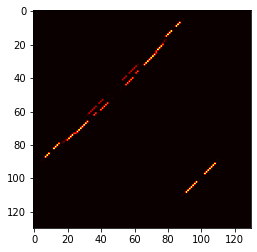

In [39]:
tamp=np.load("bpps/"+idx+".npy")
plt.imshow(tamp,cmap="hot")